In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:

!python -m spacy download en_core_web_lg

In [ ]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
data = pd.read_csv('drive/My Drive/dataset.csv', index_col=None)
data=data[['publish_date','headline_text']].drop_duplicates()
data['publish_date']=pd.to_datetime(data['publish_date'],format="%Y%M%d")
data['year']=data['publish_date'].dt.year


In [ ]:
import spacy
nlp=spacy.load("en_core_web_lg")

In [ ]:
#took 6 minutes
### Get imp words by year
import sklearn.feature_extraction.text as text
def get_imp(bow,mf,ngram):
    tfidf=text.CountVectorizer(bow,ngram_range=(ngram,ngram),max_features=mf,stop_words='english')
    matrix=tfidf.fit_transform(bow)
    return pd.Series(np.array(matrix.sum(axis=0))[0],index=tfidf.get_feature_names()).sort_values(ascending=False).head(100)
### Global trends
bow=data['headline_text'].tolist()
total_data=get_imp(bow,mf=5000,ngram=1)
total_data_bigram=get_imp(bow=bow,mf=5000,ngram=2)
total_data_trigram=get_imp(bow=bow,mf=5000,ngram=3)
### Yearly trends
imp_terms_unigram={}
for y in data['year'].unique():
    bow=data[data['year']==y]['headline_text'].tolist()
    imp_terms_unigram[y]=get_imp(bow,mf=5000,ngram=1)
imp_terms_bigram={}
for y in data['year'].unique():
    bow=data[data['year']==y]['headline_text'].tolist()
    imp_terms_bigram[y]=get_imp(bow,mf=5000,ngram=2)
imp_terms_trigram={}
for y in data['year'].unique():
    bow=data[data['year']==y]['headline_text'].tolist()
    imp_terms_trigram[y]=get_imp(bow,mf=5000,ngram=3)

In [ ]:
common_unigram={}
for y in np.arange(2001,2017,1):
    if y==2001:       
        common_unigram[y]=set(imp_terms_unigram[y].index).intersection(set(imp_terms_unigram[y+1].index))
    else:
        common_unigram[y]=common_unigram[y-1].intersection(set(imp_terms_unigram[y+1].index))
### Common bigrams across all the years
common_bigram={}
for y in np.arange(2001,2017,1):
    if y==2001:
         common_bigram[y]=set(imp_terms_bigram[y].index).intersection(set(imp_terms_bigram[y+1].index))
    else:
        common_bigram[y]=common_bigram[y-1].intersection(set(imp_terms_bigram[y+1].index))
### Common trigrams, 1 year window
common_trigram_1yr={}
for y in np.arange(2001,2017,1):
    common_trigram_1yr[str(y)+"-"+str(y+1)]=set(imp_terms_trigram[y].index).intersection(set(imp_terms_trigram[y+1].index))
### Commin trigrams, 2 year window
common_trigram_2yr={}
for y in np.arange(2001,2015,3):
    if y==2001:
        common_trigram_2yr[str(y)+"-"+str(y+1)+"-"+str(y+2)]=set(imp_terms_trigram[y].index).intersection(set(imp_terms_trigram[y+1].index)).intersection(set(imp_terms_trigram[y+2].index))
    else:
        common_trigram_2yr[str(y)+"-"+str(y+1)+"-"+str(y+2)]=set(imp_terms_trigram[y].index).intersection(set(imp_terms_trigram[y+1].index)).intersection(set(imp_terms_trigram[y+2].index))

# Visualisation of the dataset through pie charts and bar graphs

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

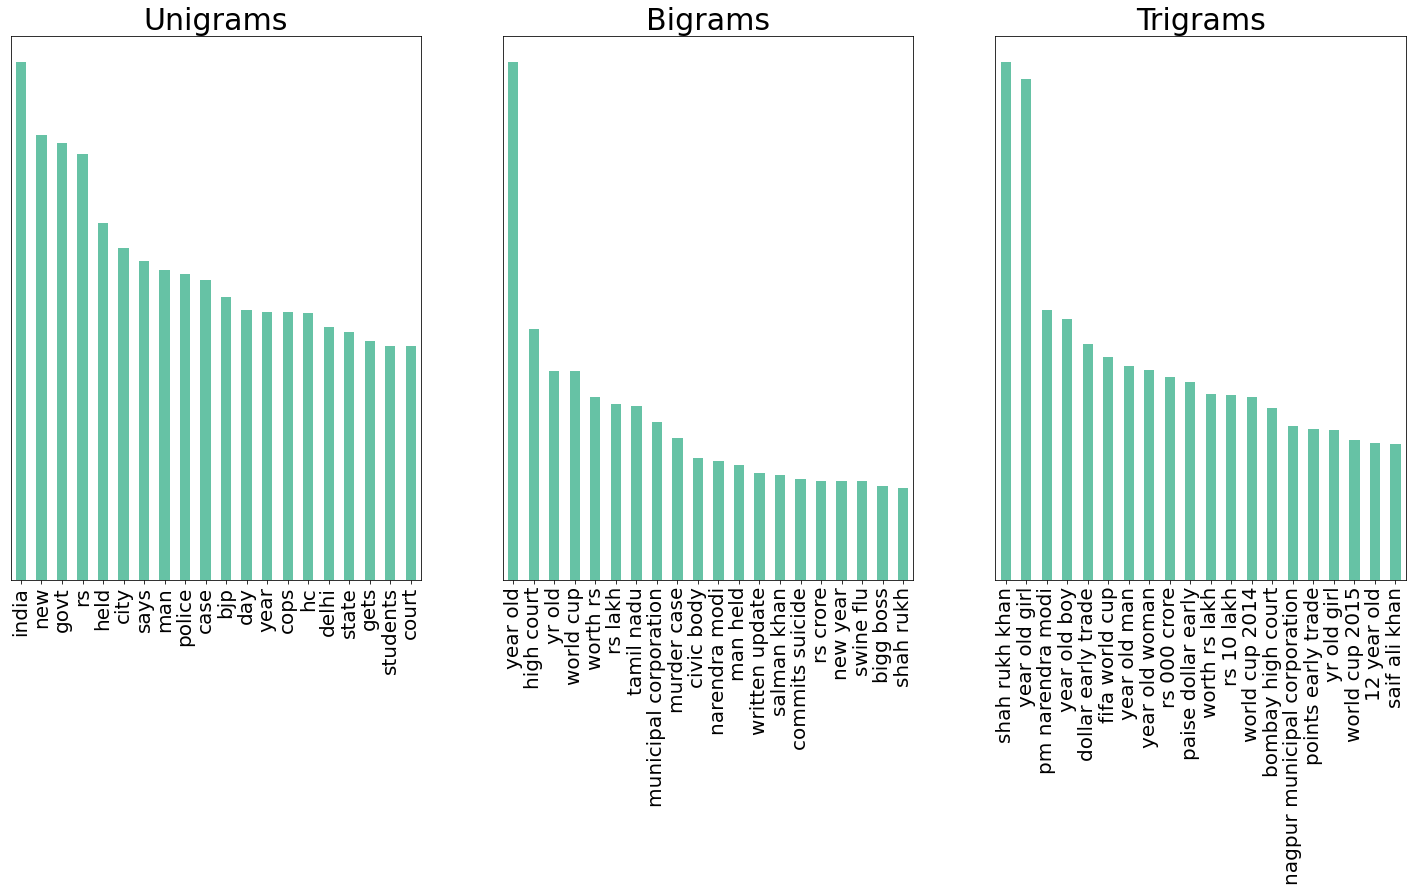

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(1,3,1)
total_data.head(20).plot(kind="bar",figsize=(25,10),colormap='Set2')
plt.title("Unigrams",fontsize=30)
plt.yticks([])
plt.xticks(size=20)
plt.subplot(1,3,2)
total_data_bigram.head(20).plot(kind="bar",figsize=(25,10),colormap='Set2')
plt.title("Bigrams",fontsize=30)
plt.yticks([])
plt.xticks(size=20)
plt.subplot(1,3,3)
total_data_trigram.head(20).plot(kind="bar",figsize=(25,10),colormap='Set2')
plt.title("Trigrams",fontsize=30)
plt.yticks([])
plt.xticks(size=20)

In [ ]:
for i in range(1,18,1):
  print(i+2000)
  print (imp_terms_bigram[2000+i].head(5))
  

2001
terror law     140
shot dead       87
worth rs        63
bail plea       61
murder case     57
dtype: int64
2002
murder case    168
shot dead      160
world cup      154
al qaeda       125
worth rs       123
dtype: int64
2003
indo pak       151
world cup      148
cbi probe      133
murder case    126
rs lakh        119
dtype: int64
2004
indo pak     109
feel good     86
yr old        86
rs lakh       71
bail plea     71
dtype: int64
2005
yr old       83
year old     71
indo pak     68
shot dead    68
rs lakh      58
dtype: int64
2006
day pics     168
nuke deal    105
yr old        99
bird flu      99
bail plea     87
dtype: int64
2007
day pics      162
world cup     161
bjp wins      153
team india    149
yr old        142
dtype: int64
2008
yr old         372
year old       321
rs lakh        150
murder case    147
sri lanka      143
dtype: int64
2009
swine flu    1050
yr old        735
year old      641
26 11         577
worth rs      438
dtype: int64
2010
world cup             5

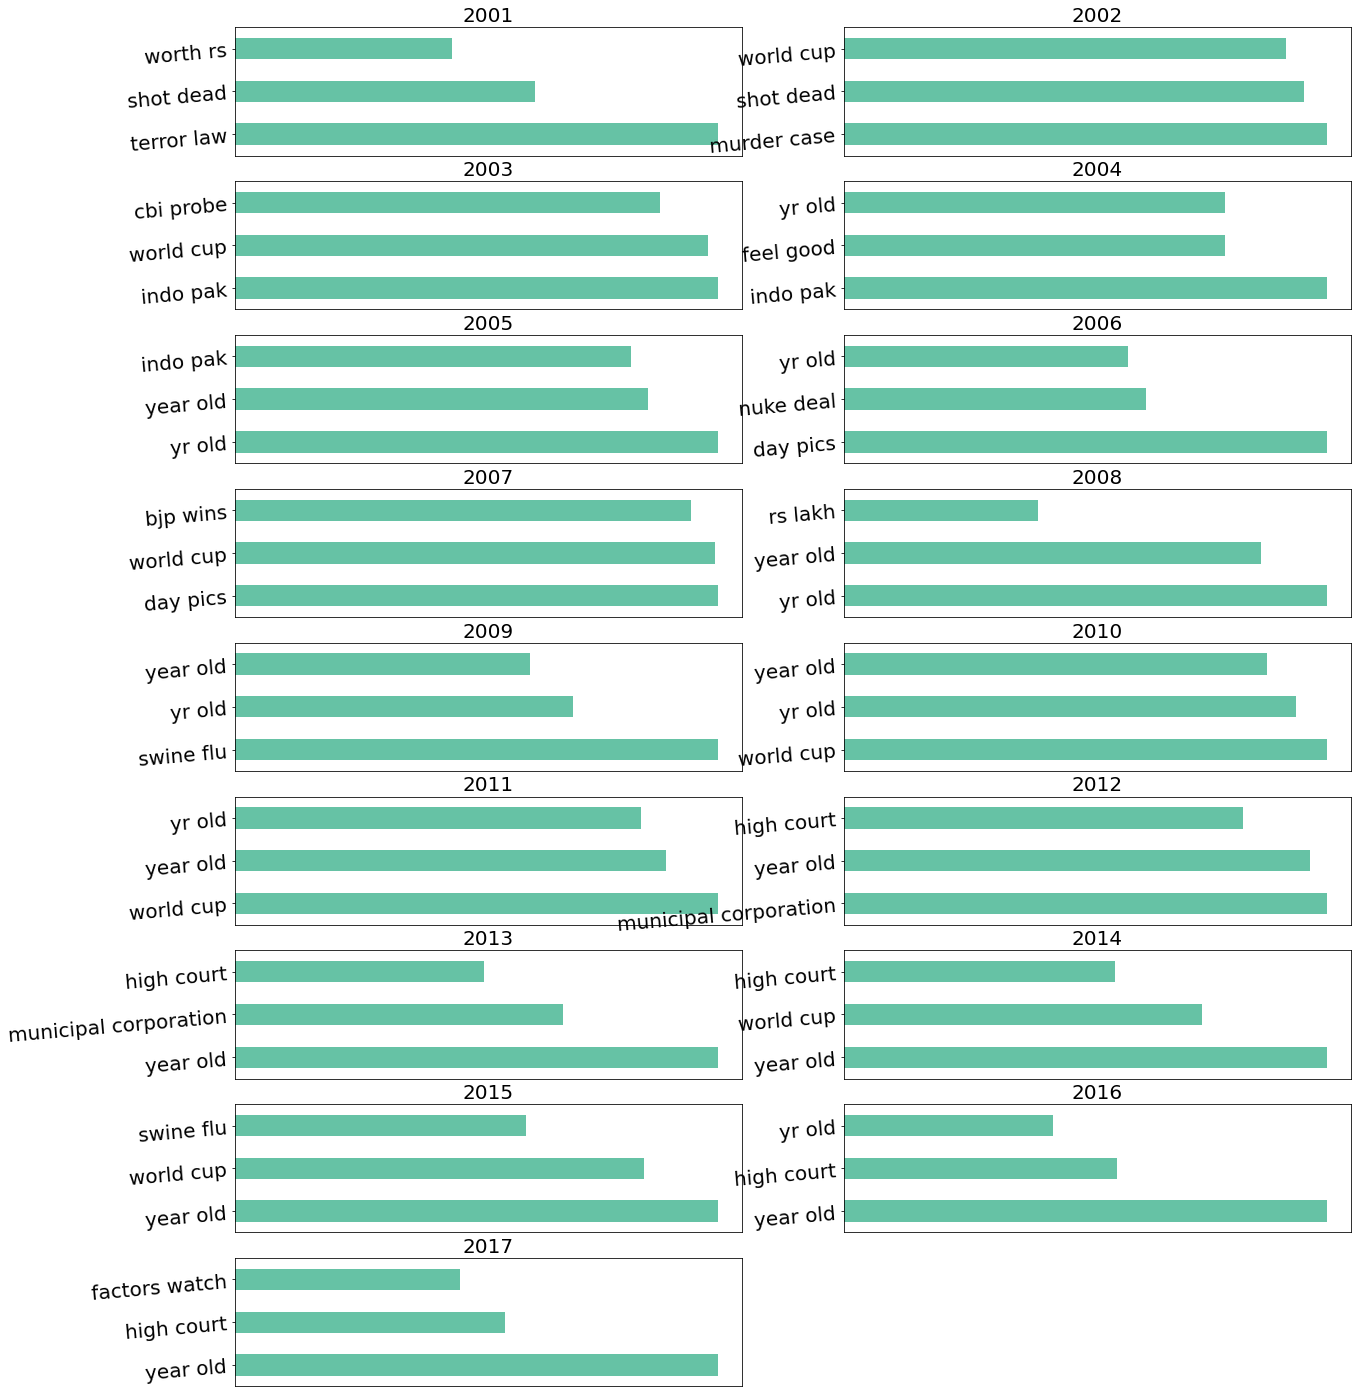

In [ ]:
for i in range(1,18,1):
    plt.subplot(9,2,i)
    imp_terms_bigram[2000+i].head(3).plot(kind="barh",figsize=(20,25),colormap='Set2')
    plt.title(2000+i,fontsize=20)
    plt.xticks([])
    plt.yticks(size=20,rotation=5)

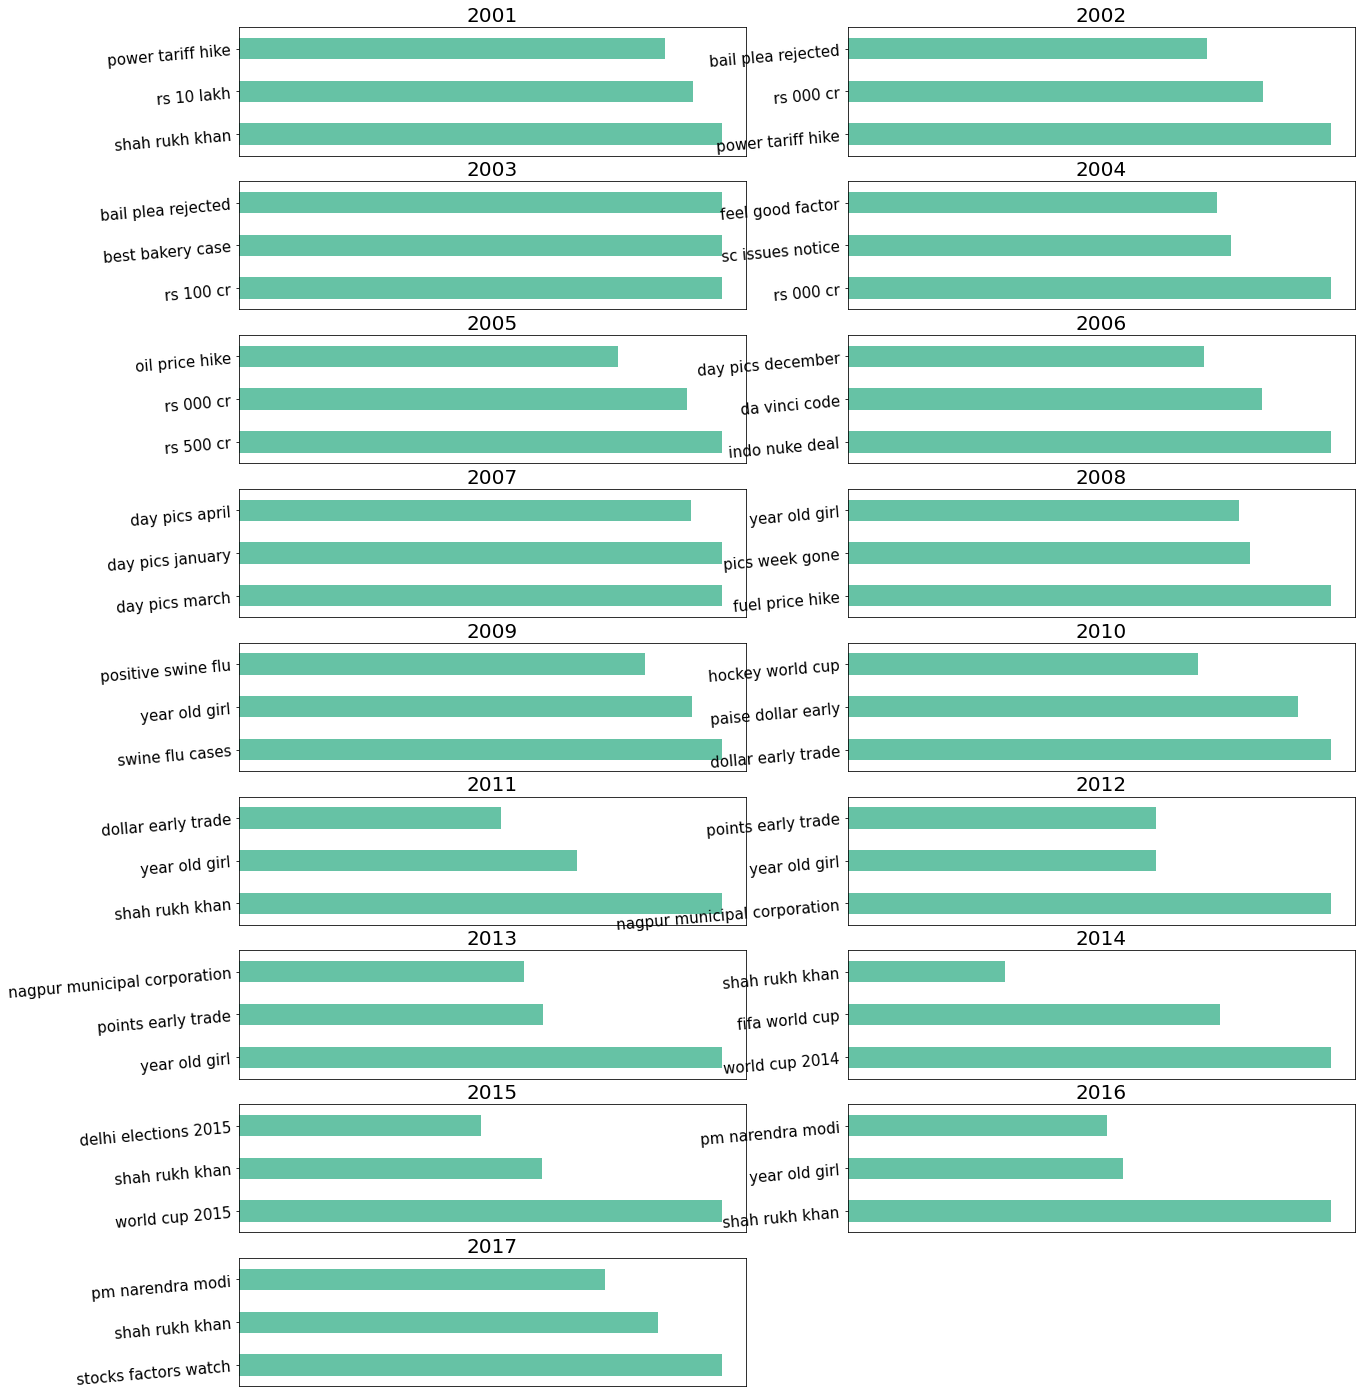

In [ ]:
for i in range(1,18,1):
    plt.subplot(9,2,i)
    imp_terms_trigram[2000+i].head(3).plot(kind="barh",figsize=(20,25),colormap="Set2")
    plt.title(2000+i,fontsize=20)
    plt.xticks([])
    plt.yticks(size=15,rotation=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


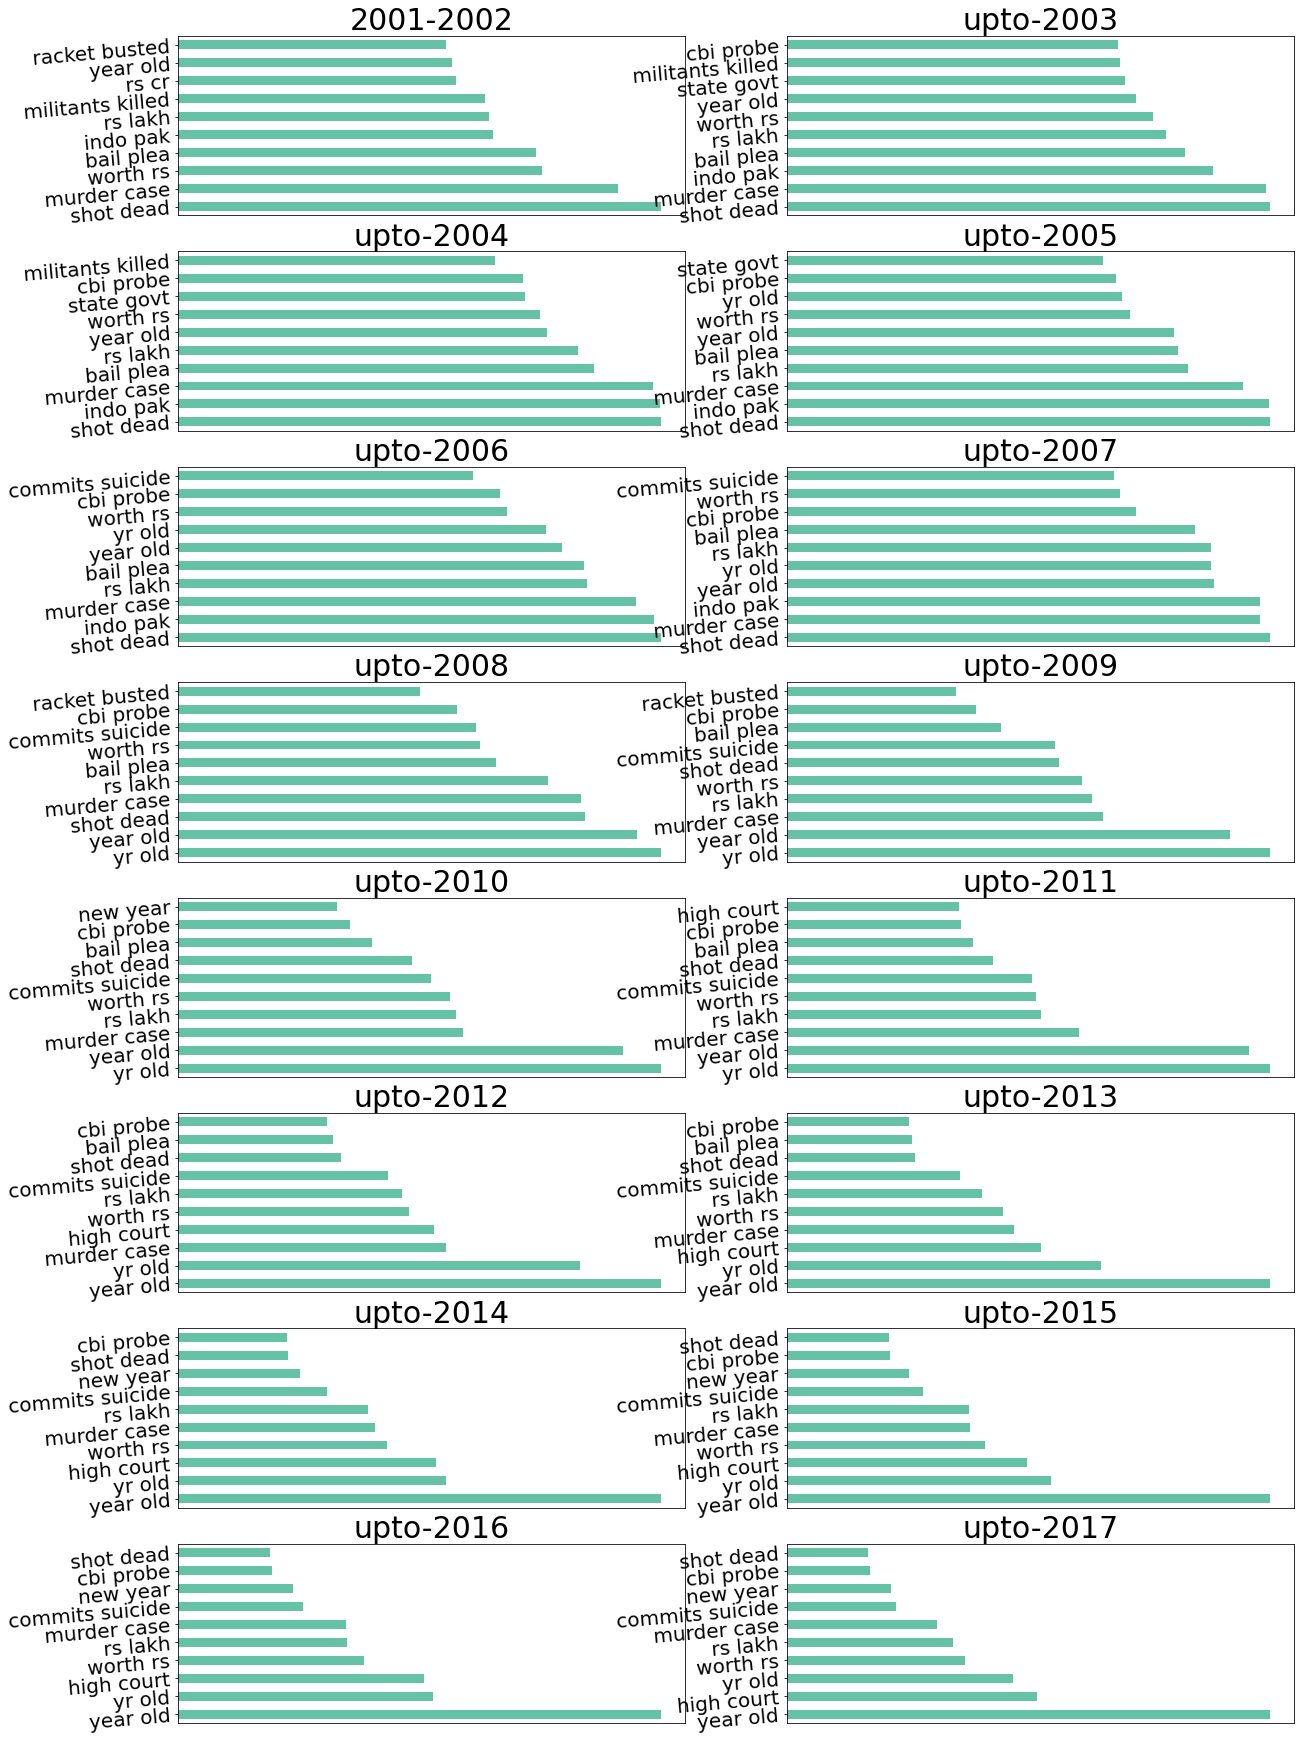

In [ ]:
count_common_bi={}
for year in range(2001,2017,1):
    count_common_bi[year]=pd.Series()
    for word in common_bigram[year]:
        if year==2001:
            count_common_bi[year][word]=imp_terms_bigram[year][word]+imp_terms_bigram[year+1][word]
        else:
            count_common_bi[year][word]=count_common_bi[year-1][word]+imp_terms_bigram[year+1][word]
for i in range(1,17,1):
    plt.subplot(9,2,i)
    count_common_bi[2000+i].sort_values(ascending=False).head(10).plot(kind="barh",figsize=(20,35),colormap="Set2")
    if (2000+i)==2001:
        plt.title(str(2000+i)+"-"+str(2000+i+1),fontsize=30)
    else:
        plt.title("upto-"+str(2000+i+1),fontsize=30)
    plt.xticks([])
    plt.yticks(size=20,rotation=5)

In [ ]:
index=data['headline_text'].str.match(r'(?=.*\bcbi\b).*$')

data['headline_text'].loc[index]

2475816    meeting of collegium to decide new cbi chief r...
2496422    cbi arrests doctor posted at railway hospital ...
2501648    cbi arrests chhattisgarh ias officer for payin...
2588820    where are anuragaposs clothes cbi asks luckow ...
2606214           shimla dist gangrape cbi registers 2 cases
2629692    cbi judge to be airlifted from panchkula to ro...
2640483    cbi books 19 companies for sending over rs 400...
2648534    cbi books income tax commissioner and husband ...
2654060    haryana judiciary paper leak hc refuses to imp...
2668984    cbi seeks permission from government to reopen...
2685401    ryan murder cbi told my son theyd kill us says...
2692378    ryan murder cbi looks at call info bank detail...
2712881    cbi files graft case against nbcc chief over a...
2743024    citys self financing colleges may seek cbi pro...
2768202    after sc ruling on manesar govt gives more hoo...
2867319    antigua claims sebi cbi did not object to chok...
2871476    aarushi talwa

In [ ]:
index=data['headline_text'].str.match(r'(?=.*\bcourt\b).*$')
data['headline_text'].loc[index]

23                   State may take AP to court over Krishna
773                      The court has faith in us: Jagmohan
926                Autolite India exonerated by French court
1828       Fiji commander rules out commitment to court r...
2448       SC tells TADA detenues to approach designated ...
                                 ...                        
2968279    Nation is made of people bound in common threa...
2968458    CBI wanted to implicate netas in Sohrabuddin S...
2968701    Disconnect water; power to illegal buildings; ...
2968805    Gauhati high court reverses IIT-G decision to ...
2969547    Apex court norms ignored as cow vigilantism ra...
Name: headline_text, Length: 19752, dtype: object

In [ ]:
index=data['headline_text'].str.match(r'(?=.*\b2G\b)(?=.*\bspectrum\b).*$')
data['headline_text'].loc[index].tolist()[0:10]

['Telecom players fight over 2G spectrum',
 'Telecos fight over 2G spectrum',
 'HFCL for 2G; 3G spectrum bidding',
 'DoT dials for 2G spectrum auction',
 "'Auctions most transparent way of distributing 2G spectrum'",
 'Parliament to take up 2G spectrum issue',
 'CVC questions DoT on 2G spectrum auctions',
 '2G spectrum for 6 cos in TN',
 '3G aspirants may not get 2G spectrum',
 'DoT forms committee for 2G spectrum allocation; pricing']

# Context of year old

In [ ]:
data['headline_text'].loc[index]

459481                Telecom players fight over 2G spectrum
459701                        Telecos fight over 2G spectrum
476897                      HFCL for 2G; 3G spectrum bidding
494811                     DoT dials for 2G spectrum auction
500361     'Auctions most transparent way of distributing...
                                 ...                        
2711515    2G spectrum case: CBI probe directionless in t...
2711516    2G spectrum case: No loss; only some sacrifice...
2711517        2G spectrum case: Prosecutor change hit trial
2711524    2G spectrum verdict: Orator & lawyer; Raja stu...
2772749    ED challenges 2G spectrum case acquittals in D...
Name: headline_text, Length: 199, dtype: object

In [ ]:
## Story of 'year old'
index=data['headline_text'].str.match(r'(?=.*\byear\b)(?=.*\bold\b).*$')
texts=data['headline_text'].loc[index].tolist()
noun=[]
verb=[]
for doc in nlp.pipe(texts,n_threads=16,batch_size=10000):
    try:
        for c in doc:
            if c.pos_=="NOUN":
                noun.append(c.text)
            elif c.pos_=="VERB":
                verb.append(c.text)            
    except:
        noun.append("")
        verb.append("")

In [ ]:

pd.Series(verb).value_counts().head(10)

held        1394
raped       1070
found        782
arrested     742
dies         732
raping       708
killed       680
kills        505
murdered     384
gets         361
dtype: int64

In [ ]:
pd.Series(noun).value_counts().head(10)

girl     2348
year     1817
boy      1232
man      1116
woman    1029
death     722
rape      552
Man       517
life      506
dies      425
dtype: int64

([], <a list of 0 Text major ticklabel objects>)

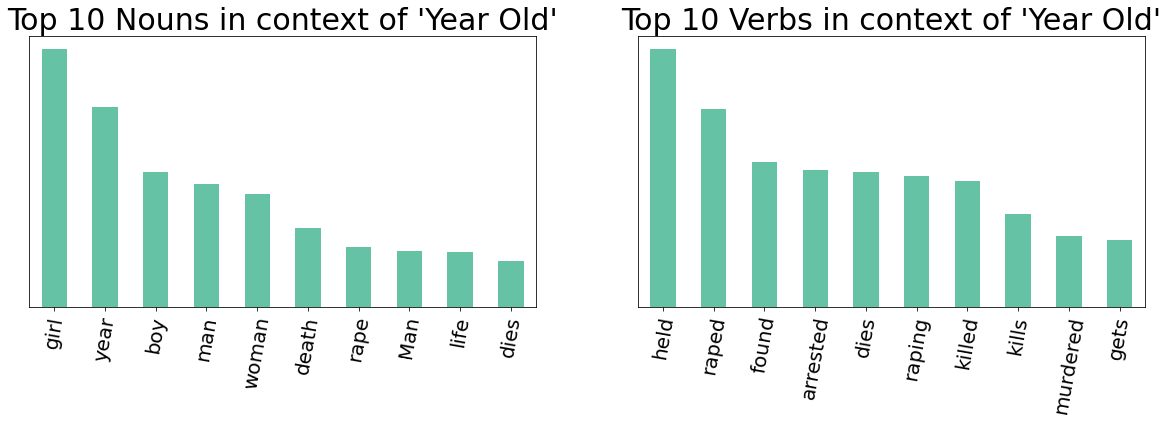

In [ ]:
plt.subplot(1,2,1)
pd.Series(noun).value_counts().head(10).plot(kind="bar",figsize=(20,5),colormap="Set2")
plt.title("Top 10 Nouns in context of 'Year Old'",fontsize=30)
plt.xticks(size=20,rotation=80)
plt.yticks([])
plt.subplot(1,2,2)
pd.Series(verb).value_counts().head(10).plot(kind="bar",figsize=(20,5),colormap="Set2")
plt.title("Top 10 Verbs in context of 'Year Old'",fontsize=30)
plt.xticks(size=20,rotation=80)
plt.yticks([])

In [ ]:
data['headline_text'].loc[index].tolist()[0:10]

['10-year-old girl missing',
 'Relative kills 9-year-old',
 '59-year-old widow murdered',
 'Spunky 60-year-old woman prevents burglary',
 "75-year-old woman done to death in B'lore",
 'Encroachments threaten 900-year-old temple',
 '3 nabbed for 5-year-old robbery',
 '25-year-old man electrocuted',
 '5-year-old boy run over',
 'Killers of 88-year-old woman arrested']

# Suicides

In [ ]:
index_s=data['headline_text'].str.match(r'(?=.*\bcommits\b)(?=.*\bsuicide\b).*$')
text_s=data['headline_text'].loc[index].tolist()
noun_s=[]
for doc in nlp.pipe(text_s,n_threads=16,batch_size=1000):
    try:
        for c in doc:
            if c.pos_=='NOUN':
                noun_s.append(c.text)
    except:
        for c in doc:
            noun_s.append("") 

Text(0.5, 1.0, "Frequency of Nouns in the context of 'Commits Suicide'")

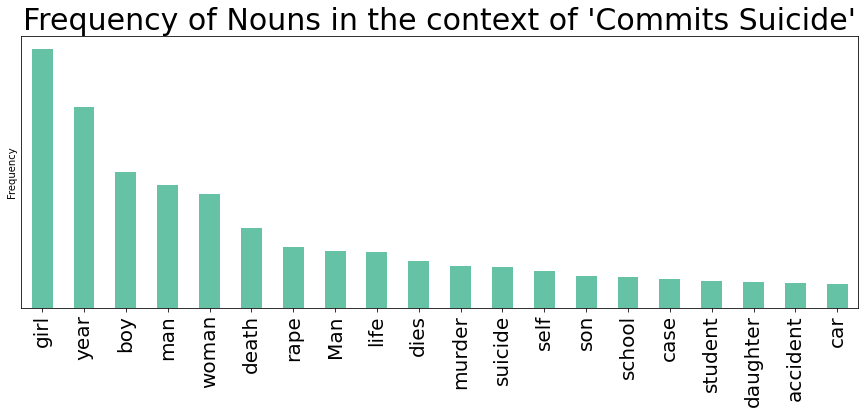

In [ ]:
pd.Series(noun_s).value_counts().head(20).plot(kind="bar",figsize=(15,5),colormap="Set2")
plt.xticks(fontsize=20)
plt.yticks([])
plt.ylabel("Frequency")
plt.title("Frequency of Nouns in the context of 'Commits Suicide'",fontsize=30)

In [ ]:
index_s=data['headline_text'].str.match(r'(?=.*\bcommits\b)(?=.*\bsuicide\b).*$',case=False)
index_farmer=data.loc[index_s]['headline_text'].str.match(r'farmer',case=False)
index_stu=data.loc[index_s]['headline_text'].str.match(r'student',case=False)

In [ ]:
print("Approximately {} percent of suicides reported were student related".format(round(np.sum(index_stu)/np.sum(index_s),2)*100))

print("Approximately {} percent of suicides reported were farmer related".format(round(np.sum(index_farmer)/np.sum(index_s),2)*100))

Approximately 2.0 percent of suicides reported were student related
Approximately 1.0 percent of suicides reported were farmer related


# TOPIC_WISE_COVERAGE

In [ ]:
data.headline_category.value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(10,10), label='COVERAGE')


# COVERAGE_EXCLUDING_INDIAN_CITIES

In [ ]:
data_non_cities = data[~data['headline_category'].str.contains('city', regex=False)] #subset of data

non_cities = data_non_cities.groupby(['headline_category'])['headline_text'].count()
non_cities

In [ ]:
ts = pd.Series(non_cities)
ts.plot(kind='pie', figsize=(10,10))
plt.show()

In [ ]:
ts.plot(kind='bar', figsize=(100,10))
def label_plot(x, y, title):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
label_plot('category', 'Number of recorded articles', 'Number of articles per headline_category')
plt.show()

In [ ]:
unknown = data['headline_category'] == 'unknown'
len(unknown[unknown == True].index)

In [ ]:
data_cities = data[data['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]


In [ ]:
data_cities['city_name'] = data_cities.headline_category.str[5:]
data_cities.head()

# CITY_WISE_COVERAGE (Internal Class)

In [ ]:
data_cities.city_name.value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(10,10), label='CITY_WISE_COVERAGE')


# % share of TOP 10 Cities

In [ ]:
data_cities.city_name.value_counts().nlargest(10)

In [ ]:
data_cities.city_name.value_counts().nlargest(10).plot(kind='pie',figsize=(9, 9), label='top10covered_cities\n\n',autopct='%1.0f%%')


In [ ]:
data_cities.city_name.value_counts().nsmallest(10)


In [ ]:
city_list = data_cities['city_name'].unique().tolist()
len(city_list)

In [ ]:
 grp_city = data_cities.groupby(['city_name'])['headline_text'].count().nlargest(10)
 grp_city

In [ ]:

#from sklearn.cluster import KMeans
#from sklearn.feature_extraction.text import TfidfVectorizer

#x = TfidfVectorizer().fit_transform(data_cities.city_name)
#km = KMeans(n_clusters=72).fit(x)
#output_array = km.labels_.tolist() # Results in a list similar to this: [0, 10, 11, 31, 71, 28...other integers between 0 to 72]
#output_array